In [17]:
import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [18]:
data = pd.read_excel(r'AirPollution.xlsx')
data

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2,Site,Date,Season
0,120.71,2.67,0.01,0.53,0.61,0,84.17,40.37,Mandai,2004-02-07,Summer
1,140.25,3.49,0.02,0.10,0.91,0,88.81,39.48,Mandai,2004-02-14,Summer
2,107.01,1.31,0.01,0.19,0.48,0,81.49,48.29,Mandai,2004-02-21,Summer
3,88.81,0.76,0.00,0.33,0.39,0,61.80,27.42,Mandai,2004-02-28,Summer
4,75.05,0.60,0.00,0.41,1.54,0,48.71,19.23,Mandai,2004-03-06,Summer
...,...,...,...,...,...,...,...,...,...,...,...
146,40.13,0.10,0.00,0.04,0.09,0,18.88,10.09,Bhosari,2004-09-01,Monsoon
147,40.38,0.10,0.00,0.03,0.09,0,47.56,24.14,Bhosari,2004-09-08,Monsoon
148,31.28,0.11,0.00,0.02,0.05,0,31.53,26.64,Bhosari,2004-09-15,Monsoon
149,52.10,0.48,0.00,0.04,0.06,0,42.08,22.95,Bhosari,2004-09-22,Monsoon


<AxesSubplot:>

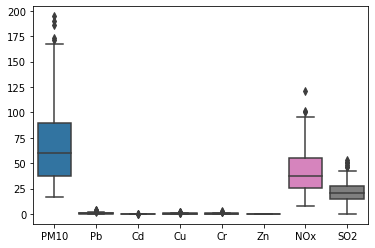

In [37]:
sns.boxplot(data=data)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   PM10    151 non-null    float64       
 1   Pb      151 non-null    float64       
 2   Cd      151 non-null    float64       
 3   Cu      151 non-null    float64       
 4   Cr      151 non-null    float64       
 5   Zn      151 non-null    int64         
 6   NOx     151 non-null    float64       
 7   SO2     151 non-null    float64       
 8   Site    151 non-null    object        
 9   Date    151 non-null    datetime64[ns]
 10  Season  151 non-null    object        
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 13.1+ KB


In [39]:
data.describe()

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.0,151.000000,151.000000
mean,68.536026,0.716358,0.000265,0.331854,0.390066,0.0,42.692914,22.359868
std,40.908548,0.673069,0.001982,0.408259,0.434575,0.0,23.101723,10.393498
min,16.240000,0.000000,0.000000,0.000000,0.000000,0.0,8.260000,0.000000
25%,37.005000,0.220000,0.000000,0.040000,0.085000,0.0,25.735000,15.165000
50%,59.610000,0.570000,0.000000,0.130000,0.230000,0.0,37.000000,20.930000
75%,89.820000,0.965000,0.000000,0.535000,0.580000,0.0,54.695000,27.420000
max,194.740000,3.490000,0.020000,1.650000,3.220000,0.0,121.460000,53.270000


In [40]:
df = data.drop(columns=['Season','Date','Site'])
df

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2
0,120.71,2.67,0.01,0.53,0.61,0,84.17,40.37
1,140.25,3.49,0.02,0.10,0.91,0,88.81,39.48
2,107.01,1.31,0.01,0.19,0.48,0,81.49,48.29
3,88.81,0.76,0.00,0.33,0.39,0,61.80,27.42
4,75.05,0.60,0.00,0.41,1.54,0,48.71,19.23
...,...,...,...,...,...,...,...,...
146,40.13,0.10,0.00,0.04,0.09,0,18.88,10.09
147,40.38,0.10,0.00,0.03,0.09,0,47.56,24.14
148,31.28,0.11,0.00,0.02,0.05,0,31.53,26.64
149,52.10,0.48,0.00,0.04,0.06,0,42.08,22.95


In [44]:
# df.columns

for i in df.columns:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3-q1
    ul = q3 + 1.5*iqr
    ll = q1 - 1.5*iqr
    df[i].clip(upper=ul,lower=ll,inplace=True)

<AxesSubplot:>

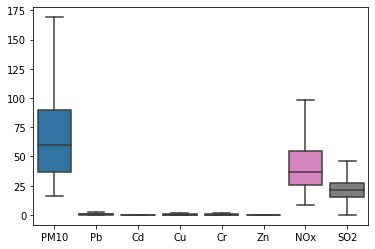

In [45]:
sns.boxplot(data=df)

In [46]:
data.isna().sum()

PM10      0
Pb        0
Cd        0
Cu        0
Cr        0
Zn        0
NOx       0
SO2       0
Site      0
Date      0
Season    0
dtype: int64

In [47]:
# Putting feature variable to X
X = data[['Pb','Cu','Cr','NOx','SO2']]

# Putting response variable to y
y = data[['PM10']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=120)

In [48]:
df_train = pd.concat([y_train, X_train],axis=1)
df_train

,PM10,Pb,Cu,Cr,NOx,SO2
125,26.19,0.0000,0.16,0.04,22.14,10.93
48,40.92,0.3900,0.08,0.21,26.00,13.66
149,52.10,0.4800,0.04,0.06,42.08,22.95
55,90.48,0.7200,0.00,0.02,39.16,15.72
63,141.11,1.3900,0.53,0.71,80.72,34.31
...,...,...,...,...,...,...
56,97.09,0.9800,0.02,0.19,49.19,29.14
47,43.29,0.3800,0.09,0.26,24.96,19.39
10,50.04,0.7100,0.08,0.19,39.96,17.58
126,19.22,0.0000,0.09,0.00,30.99,24.37


In [27]:
df_train.corr()

,PM10,Pb,Cu,Cr,NOx,SO2
PM10,1.000000,0.881124,0.696160,0.841537,0.551074,0.519019
Pb,0.881124,1.000000,0.643005,0.771554,0.649313,0.595104
Cu,0.696160,0.643005,1.000000,0.759803,0.444826,0.433378
Cr,0.841537,0.771554,0.759803,1.000000,0.475384,0.438371
NOx,0.551074,0.649313,0.444826,0.475384,1.000000,0.860182
SO2,0.519019,0.595104,0.433378,0.438371,0.860182,1.000000


<AxesSubplot:>

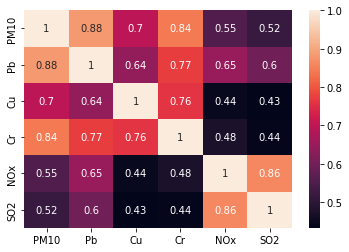

In [28]:
sns.heatmap(df_train.corr(),annot = True)

<AxesSubplot:xlabel='Pb', ylabel='PM10'>

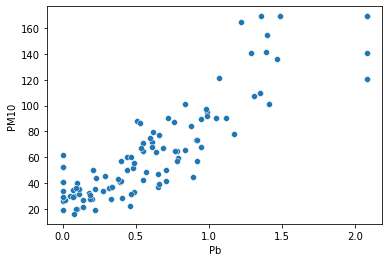

In [29]:
sns.scatterplot(x='Pb',y='PM10',data=df_train)

<AxesSubplot:xlabel='Cr', ylabel='PM10'>

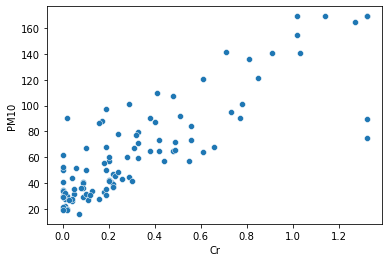

In [30]:
sns.scatterplot(x='Cr',y='PM10',data=df_train)

In [31]:
X1 = df_train.drop(['PM10'],axis=1)

series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

Pb      8.256261
Cu      3.752367
Cr      6.591469
NOx    21.747451
SO2    19.438557
dtype: float64

In [32]:
import statsmodels.formula.api as smf
model = smf.ols('PM10 ~ Pb + Cu + Cr + NOx + SO2',data=df_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM10   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     106.4
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           3.21e-38
Time:                        14:00:01   Log-Likelihood:                -435.59
No. Observations:                 105   AIC:                             883.2
Df Residuals:                      99   BIC:                             899.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.7742      3.884      5.864      0.000      15.068      30.480
Pb            44.6508      5.622      7.942      0.000      33.495      55.806
Cu             6.5656      7.028      0.934      0.352      -7.379      20.510
Cr            40.0426      8.319      4.813      0.000      23.536      56.550
NOx           -0.1088      0.162     -0.670      0.504      -0.431       0.213
SO2            0.1625      0.324      0.502      0.617      -0.480       0.805
==============================================================================
Omnibus:                        3.360   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                3.082
Skew:                           0.420   Prob(JB):                        0.214
Kurtosis:                       3.008   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
model2=smf.ols('PM10 ~ Pb + Cr',data=df_train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM10   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     269.7
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           1.87e-41
Time:                        14:00:01   Log-Likelihood:                -436.30
No. Observations:                 105   AIC:                             878.6
Df Residuals:                     102   BIC:                             886.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.4490      2.407      9.328      0.000      17.675      27.223
Pb            44.2223      4.791      9.230      0.000      34.719      53.726
Cr            44.4242      6.901      6.438      0.000      30.737      58.111
==============================================================================
Omnibus:                        2.564   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.278   Jarque-Bera (JB):                2.275
Skew:                           0.360   Prob(JB):                        0.321
Kurtosis:                       3.019   Cond. No.                         6.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
X1=df_train.loc[:,['Pb','Cr']]
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])], 
                          index=X1.columns)
series_before

Pb    4.650496
Cr    4.650496
dtype: float64

In [35]:
df_train['fitted_value']=model2.fittedvalues #Predicted Value
df_train['residual']=model2.resid  #Error
df_train.head()

,PM10,Pb,Cu,Cr,NOx,SO2,fitted_value,residual
125,26.19,0.00,0.16,0.04,22.14,10.93,24.225925,1.964075
48,40.92,0.39,0.08,0.21,26.00,13.66,49.024738,-8.104738
149,52.10,0.48,0.04,0.06,42.08,22.95,46.341115,5.758885
55,90.48,0.72,0.00,0.02,39.16,15.72,55.177501,35.302499
63,141.11,1.39,0.53,0.71,80.72,34.31,115.459146,25.650854


In [36]:
df_test = pd.concat([X_test,y_test],axis=1)

df_test.head()

,Pb,Cu,Cr,NOx,SO2,PM10
62,1.42,0.11,0.92,95.74,45.8025,153.89
143,0.00,0.00,0.00,30.52,24.5100,37.08
86,1.86,0.97,0.79,78.57,28.7700,99.98
80,0.81,0.83,0.54,39.49,14.8700,81.15
100,0.98,0.97,0.94,33.19,19.1500,101.86


In [37]:
df_test['Prediction'] = model2.predict(df_test) # predict = all row prediction ( Auto )
df_test.head()

,Pb,Cu,Cr,NOx,SO2,PM10,Prediction
62,1.42,0.11,0.92,95.74,45.8025,153.89,126.114898
143,0.00,0.00,0.00,30.52,24.5100,37.08,22.448956
86,1.86,0.97,0.79,78.57,28.7700,99.98,139.797566
80,0.81,0.83,0.54,39.49,14.8700,81.15,82.258094
100,0.98,0.97,0.94,33.19,19.1500,101.86,107.545567


In [38]:
import math
from sklearn.metrics import mean_squared_error

# calculate the mean squared error
model_mse = mean_squared_error(df_train['PM10'],df_train['fitted_value'])

# calulcate the root mean squared error
model_rmse = math.sqrt(model_mse)
# display the output
print("RMSE {:.3}".format(model_rmse))

RMSE 15.4
